In [1]:
import numpy as np

import matplotlib.pyplot as plt
import rcparams
plt.rcParams.update(rcparams.params)
plt.rcParams.update({'font.size': 12})

from matplotlib.lines import Line2D

In [2]:
def rw(r, sigma=0, l=0):
    return (1 - (2/r))*((l*(l+1)/r**2) + ((1-sigma**2)*2/r**3))

def rstar(r):
    return r + 2*np.log(r/2 - 1)

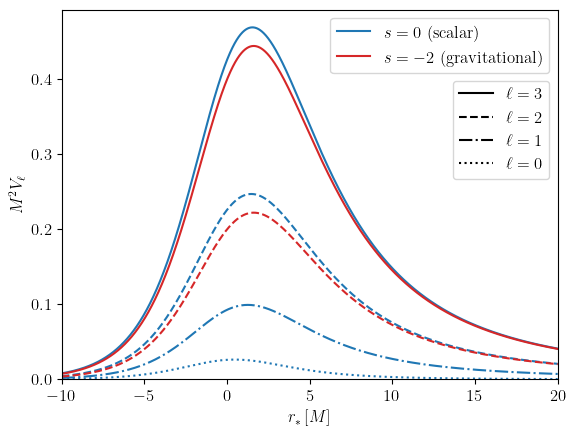

In [3]:
fig, ax = plt.subplots()

r_array = np.linspace(2, 20, int(1e6))[1:]
rstar_array = rstar(r_array)

# Scalar
# ------
c = 'C0'
ax.plot(rstar_array, rw(r_array, sigma=0, l=0), c=c, ls=':', alpha=1)
ax.plot(rstar_array, rw(r_array, sigma=0, l=1), c=c, ls='-.', alpha=1)
ax.plot(rstar_array, rw(r_array, sigma=0, l=2), c=c, ls='--', alpha=1)
ax.plot(rstar_array, rw(r_array, sigma=0, l=3), c=c, ls='-', alpha=1)

# Gravitational
# -------------
c = 'C3'
ax.plot(rstar_array, rw(r_array, sigma=1, l=2), c=c, ls='--', alpha=1)
ax.plot(rstar_array, rw(r_array, sigma=1, l=3), c=c, ls='-', alpha=1)

# Axes
# ----

ax.set_ylim(0)
ax.set_xlim(-10,20)

ax.set_ylabel('$M^2 V_\ell$')
ax.set_xlabel('$r_*\,[M]$')

# Legends
# -------

l1 = ax.legend(
    [Line2D([], [], c='C0'), Line2D([], [], c='C3')], 
    ['$s = 0$ (scalar)', '$s = -2$ (gravitational)'], 
    # frameon=False,
    # ncol=2,
    loc='upper right',
    # fontsize=11,
    # bbox_to_anchor=(0.98, 1)
)

ax.add_artist(l1)

l2 = ax.legend(
    [Line2D([], [], c='k', ls=':'), Line2D([], [], c='k', ls='-.'), Line2D([], [], c='k', ls='--'), Line2D([], [], c='k', ls='-')][::-1], 
    ['$\ell = 0$', '$\ell = 1$', '$\ell = 2$', '$\ell = 3$'][::-1], 
    # frameon=False,
    ncol=1,
    loc='upper right',
    # fontsize=11,
    bbox_to_anchor=(1, 0.83)
)

fig.savefig('rw_potential.pdf', bbox_inches='tight')